# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цели исследования:**

1. Найти интересные особенности и зависимости, которые существуют на рынке недвижимости в предложенном сегменте.
2. Понять насколько качественно были внесены данные людьми.
3. Определить насколько качественно заполнились автоматизированные данные (в данном случае картографические).
4. Найти взаимосвязь общей итоговой стоиомсти квартир от данных нам параметров (с какими связь есть, с какими нет).

**Ход исследования**
<br>
1. Изучение данных из файла.
На это этапе нас ждёт общее ознакомительное знакомство с данными. Выведем гистограммы для наглядности. Сделаем первые выводы о данных:
- насколько их достаточно для проведения анализа;
- нет ли явных аномалий, которые могут помешать работе;
- все ли типы данных соотвествуют содержанию.
<br>
2. Предобработка данных.
На этом этапе мы:
- найдём и изучим все пропущенные значения, 
- постараемся понять их природу и устранить те, которые сможем с помощью заполненения определенными данными, в которых уверены (например, 0 - когда знаем, что пропуск означает нулевое значение); медианными значениями, когда это безопасно и не исказит общую картину. 
- удалим строки, если их количество будет достаточно маленьким и их отсутствие не повредит целостности таблицы;
- поменяем типы данных некоторых столбцов, чтобы облегчить дальнейшие вычисления. 
<br>
3. Расчёты и добавление результатов в таблицу.
В этом пункет нам понадоится добавить несколько параметров, которые помогут дальше при вычислении взаимосвязей. Значения этих столбцов будут базироваться на значениях других (где-то 
<br>
<br>
4. Исследовательский анализ данных.
Построим сводные таблицы, графики, вычислим коэффициенты корреляции, найдём взаимосвязи и взаимовлияния.
<br>
<br>
5. Общий вывод.
Этот пункт будет состоять из единого сборного вывода из вышеперечисленных пунктов и общего вывода о проведённой работе. 
<br>
<br>
По каждому пункту хода исследования мы сделаем промежуточные выводы, которые в конце соберём в большой единый.

### Откройте файл с данными и изучите общую информацию. 

In [4]:
# импортируем
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# выводим общие данные по таблице
data.info()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

У нас есть 23699 записей о квартирах по 22 параметрам. Для необходимого анализа информации нам будет достаточно. В данных есть много пропусков, несколько столбцов нуждаются в переименовании, в некоторых нужно будет изменить типа данных.

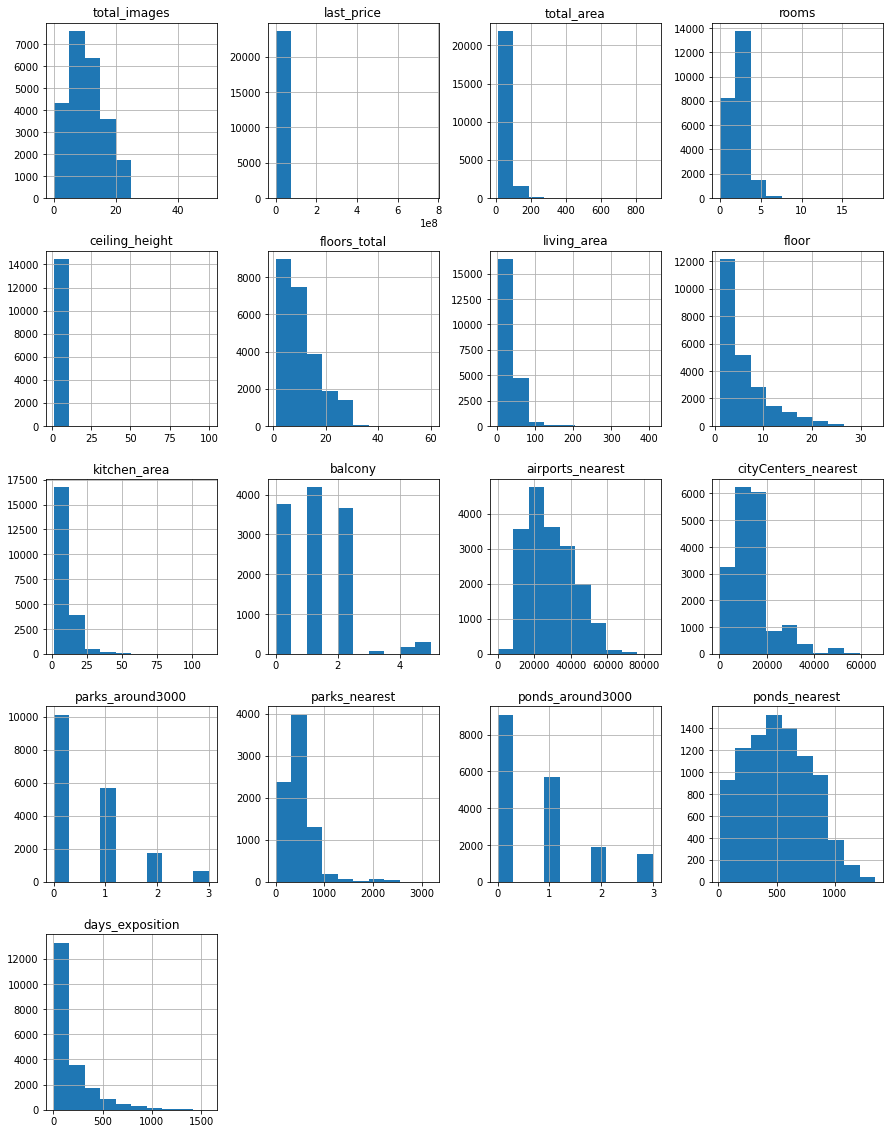

In [5]:
# построим гистограммы для числовых столбцов
data.hist(figsize=(15, 20));



### Предобработка данных

**Переименуем столбцы**

Для унификации переименуем некоторые названия столбцов в соответствии со "змеиным регистром".

In [6]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                            'parks_around3000': 'parks_around_3000',
                            'ponds_around3000': 'ponds_around_3000'})
# проверим результат:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Определим, в каких столбцах есть пропуски**

In [7]:
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [98]:
# пробую твой способ
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,0.000000
floor,0.000000
is_apartment,0.000000


**Проанализируем данные по пропущенным значениям:**
<br>
<br>
Высота потолков (ceiling_height) – 9195, более, чем у трети записей не указана высота потолков. Заполнять средними или медианным значениями будет неверным решением, так как квартиры в центре Петербурга, в старом фонде и в новостройке в его пригороде могут значительно отличаться, заполнить средними будет несправедливо, оставляем.
<br>
<br>
Этажей в доме (floors_total) – 86, возможно пропуски в этом столбце могут означать, что дом одноэтажный, либо данные не были заполненный случайно или намерены. Их количество составляет 0,4%. Это довольно немyого, поэтому ими можно пожертвоать и удалить строки. 
<br>
<br>
Жилая площадь (living_area) – 1903, оставляем незаполненными.
<br>
<br>
Апартаменты (is_apartment) – 20924, скорее всего произошла ошибка при заполнении. Так как это булев тип данных, незаполненность параметра вероятнее всего означает –"нет", поэтому заполним эти пропуски как False.
<br>
<br>
Площадь кухни (kitchen_area) – 2278, могла остаться незаполненной, потому что это квартира-студия. 
<br>
<br>
Балкон (balcony) – 11519, пропущенное значение в столбце с балконами вероятно означает его отсутствие, заполним 0.
<br>
<br>
Название населённого пунтка (locality_name) – 49, скорее всего пропустили при заполнении и так как заполнить нечем, учитывая, что это количестов всего 0,2% от количества всех строк, можем удалить.
<br>
<br>
Центр города (city_centers_nearest) – 5519, к этим квартирам центр не близок, оставляем пропуск.
<br>
<br>
Как парки в радиусе 3 км (parks_around_3000) – 5518, так и водоёмы в радуисе 3 км (ponds_around_3000) – 5518 не были заполнены. Так как эти данные загружаются автоматически на основе картографических данных, можем предположить, что могла не определиться геолокация и данные не подгрузилиcь. Либо этих объектов ближе 3 км просто нет. Поэтому можно заполнить нулём. 
<br>
<br>
Расстояние до аэропорта (airports_nearest) – 5542, до ближайшего парка (parks_nearest) – 15620 и ближайшего водоёма (ponds_nearest) – 14589 не заполнены скорее всего тоже из-за сбоя подгрузки геоданных.
<br>
<br>
Значения сколько дней было опубликовано объявление (days_exposition) оказалось пропущенным в 3181 строках. Незаполненное значение может означать, что объявление на данный момент активно. При необходимости заполнения, можем вычислить количество дней, которо вычитая из текущей даты, дату размещения объявления.

**Заполним некоторые пропуски**

In [8]:
# заполняем пропуски в столбце is_apartment параметром False
data['is_apartment'] = data['is_apartment'].fillna('False')

# заполняем пропуски в столбцах balcony, parks_around_3000, ponds_around_3000 нулём
data['balcony'] = data['balcony'].fillna(0)
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

**Удалим некоторые пропуски**

In [9]:
# удаляем те пропуски, строками с которыми можно пожертвовать: в столбцах locality_name и floors_total
data.dropna(subset=['locality_name'], inplace=True) 
data.dropna(subset=['floors_total'], inplace=True)

**Поменяем тип данных у некоторых столбцов, для возомжности корректной работы с ними:**
<br>
1. Тип данных столбцов last_price, floors_total, balcony, parks_around_3000, ponds_around_3000 с float изменим на целочисленный int, так как цена, количество этажей и балконов, количество парков и водоёмов могут быть только целыми.
2. Тип данных у first_day_exposition сделаем 'datetime'.
3. В столбце is_apartment установим булев тип данных.

In [10]:
# заменяем тип данных столбцов last_price, floors_total, balcony, parks_around_3000, ponds_around_3000
data['last_price'] = data['last_price'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_around_3000'] = data['parks_around_3000'].astype(int)
data['ponds_around_3000'] = data['ponds_around_3000'].astype(int)

# заменяем тип данных столбцов first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# заменяем тип данных столбца is_apartment
data['is_apartment'] = data['is_apartment'].astype('bool')

# проверим как прошло с типами данных
data.info()

# проверим как дела с пропусками
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000           0
parks_nearest           15535
ponds_around_3000           0
ponds_nearest           14529
days_exposition          3171
dtype: int64

**Проанализируем уникальные значения и дубликаты**

Проверим датафрейм на явные дубликаты

In [11]:
data.duplicated().sum()

0

Явных дубликатов не выявлено.

Проверим сколько уникальных значений в столбце locality_name

In [12]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [13]:
print('Количество уникальных названий населённых пунктов:', data['locality_name'].nunique())

Количество уникальных названий населённых пунктов: 364


Заменим в столбце locality_name букву ё на е.

In [14]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')


Заменим в столбце locality_name значения "поселок","городской поселок" на "поселок городского типа".

In [15]:
# data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа'
#                                                         ).str.replace('поселок','поселок городского типа')

In [16]:
data = data.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))

len(data.locality_name.unique())

330

Проверим количество уникальных значений после замен

In [17]:
print('Количество уникальных названий населённых пунктов:', data['locality_name'].nunique())

Количество уникальных названий населённых пунктов: 330


Итого мы сократили количестов неявных дубликатов на 41 шт.

**Поработаем с редкими, выбивающимися значениями**

Изучим статистические данные по столбцам таблицы

In [18]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Изучим столбец ceiling_height.
<br>


count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

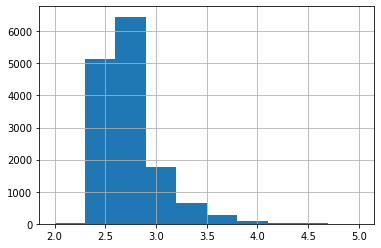

In [19]:
# построим гистрограму
data['ceiling_height'].hist(bins=10, range=(2, 5))
# изучим статистические данные
data['ceiling_height'].describe()

In [20]:
# изучим уникальные значения 

unique_ceiling_height = data['ceiling_height'].unique()
# отсортируем и выведем значения по возрастанию, чтобы наглядно увидеть все значения и размах выбросов
print(sorted(unique_ceiling_height))

[1.0, 2.0, 2.3, 2.4, 2.45, 2.46, 2.48, 2.53, 2.59, 2.62, 2.63, 2.7, nan, 1.2, 1.75, 2.2, 2.25, 2.34, 2.47, 2.49, 2.5, 2.51, 2.52, 2.54, 2.55, 2.56, 2.57, 2.58, 2.6, 2.61, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 1

Выбиваются значения с двузначной и трехзначныой целой частью, например: 27,5; 32; 27; 26; 22,6; 10,3; 24; 25; 20 - такая высота потолка в метрах слабопредставима. Вероятнее всего, при введении данных ошиблись с запятой. Эти данные нужно будет поправить, вернуть запятую на место. 
<br>


In [21]:
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 50
                                                  )]['ceiling_height']/10)

unique_ceiling_height = data['ceiling_height'].unique()
# отсортируем и проверим, все ли запятые нашли свои места
print(sorted(unique_ceiling_height))

[1.0, 1.2, 1.75, 2.0, 2.2, 2.25, 2.7, nan, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 1

Встречаются явные выбросы: 1м , 100м. От них нужно будет избавиться.
<br>
По СНИПу высота потолка не может быть ниже 2,5 м. Максимальная высота потолков, например, в старом фондев Петербурге может достигать и 4,5 м. Округлим  на всякий случай до 5 м (жили же люди!). 
<br>
<br>
Итого удаляем значения:
- меньше 2,5.
- больше 5.

In [22]:
data = data[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 5)]
unique_ceiling_height = data['ceiling_height'].unique()
# отсортируем и выведем уникальные значения по возрастанию после удаления выбросов
print(sorted(unique_ceiling_height))

[2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0]


Теперь можно заполнить пропуски в столбце медианными значениями

In [23]:
median_ceiling_height = data['ceiling_height'].median()
data['ceiling_height'].fillna(median_ceiling_height, inplace=True)
# проверим 
data['ceiling_height'].isna().value_counts()

False    14391
Name: ceiling_height, dtype: int64

**Вывод раздела по предобработке данных**
<br>
<br>
Качество исходных данных не позволило работать с ними сразу, многие столбцы датафрейма потребовали предобработки. Природу ошибок можно предположить – технические сбои при автоматических загрузках данных и человеческий фактор при заполнении – ошибки людей.
<br>
<br>
Однако, многие несовершенства нам удалось преододелеть. Что смогли на данном этапи удалил, что смогли заполнили корректиными данными. С остальным будем работать дальше, на следующих этапах.В процессе предобработки данных
<br>
<br>
**Что было сделано**
<br>
<br>
Были удалены строки с пропусками у столбцов:
- locality_name
- floors_total
<br>
<br>
Заполнены пропуски:
- balcony
- parks_around_3000
- ponds_around_3000
<br>
<br>
Для возомжности корректной обработки, изменён тип данных столбцов:
- last_price 
- floors_total
- balcony
- parks_around_3000 
- ponds_around_3000
- first_day_exposition
- first_day_exposition
- is_apartment
<br>
<br>
Обработаны и заполнены медианными значениями:
- ceiling_height
- locality_name


### Посчитайте и добавьте в таблицу новые столбцы

Добавляем в датафрейм столбец "Цена за квадртаный метр"

In [24]:
data['price_sqm'] = data['last_price']/data['total_area']


Добавляем столбец "День недели публикации объявления"

In [25]:
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

Добавляем столбец "Месяц публикации объявления"

In [26]:
data['exposition_month'] = data['first_day_exposition'].dt.month

Добавляем столбец "Год публикации объявления"

In [27]:
data['exposition_year'] = data['first_day_exposition'].dt.year

Добавляем столбец "Тип этажа квартиры" (значения — «первый», «последний», «другой»)

In [28]:


def get_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(get_floor_type, axis=1)


Добавляем столбец "Расстояние до центра".

In [29]:
data['distance_center'] = round(data['city_centers_nearest'] / 1000)

Проверим добавленные столбцы

In [30]:
data.info()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14391 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14391 non-null  int64         
 1   last_price            14391 non-null  int64         
 2   total_area            14391 non-null  float64       
 3   first_day_exposition  14391 non-null  datetime64[ns]
 4   rooms                 14391 non-null  int64         
 5   ceiling_height        14391 non-null  float64       
 6   floors_total          14391 non-null  int64         
 7   living_area           13605 non-null  float64       
 8   floor                 14391 non-null  int64         
 9   is_apartment          14391 non-null  bool          
 10  studio                14391 non-null  bool          
 11  open_plan             14391 non-null  bool          
 12  kitchen_area          13468 non-null  float64       
 13  balcony         

### Проведите исследовательский анализ данных

**Изучим параметр объекта "Общая площадь"**

In [31]:
data['total_area'].describe()

count    14391.000000
mean        61.883570
std         36.852883
min         12.000000
25%         41.000000
50%         53.400000
75%         71.400000
max        900.000000
Name: total_area, dtype: float64

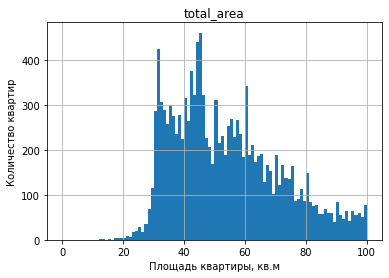

In [32]:
# строим гистограмму
import matplotlib.pyplot as plt

data['total_area'].hist(range=(0, 100), bins=100)

plt.xlabel('Площадь квартиры, кв.м')
plt.ylabel('Количество квартир')
plt.title('total_area')

plt.show()

На гистограмме видно, что большинство квартир имеют площадь от 20 до 100 кв.м, при этом наиболее распространенные площади находятся в диапазоне 40-60 кв.м. Распределение схоже с нормальным, но имеет несколько пиков в районе 30, 50 и 60 кв.м.

**Изучим параметр объекта "Жилая площадь"**

In [33]:
data['living_area'].describe()

count    13605.000000
mean        35.675009
std         22.819838
min          2.000000
25%         19.200000
50%         30.800000
75%         43.300000
max        409.700000
Name: living_area, dtype: float64

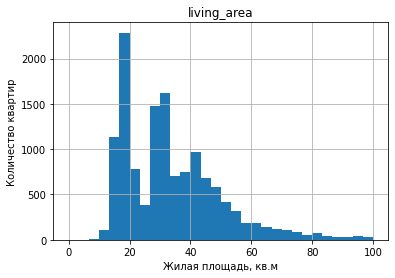

In [34]:
# строим гистограмму
import matplotlib.pyplot as plt

data['living_area'].hist(range=(0, 100), bins=30)

plt.xlabel('Жилая площадь, кв.м')
plt.ylabel('Количество квартир')
plt.title('living_area')

plt.show()

Из графика видно, что большинство жилой площади квартир составляет от 30 до 50 кв.м. Наблюдаем несколько пиков – в районе 30 кв.м (что объяснимо популярностью однокомнатных квартир) и в районе 20 кв.м (это могут быть квартиры-студии). Есть выбросы как в минимальную, так и в максимальную сторону. 
<br>
Посмотрим сколько очень маленьких и очень больших по площади квартир. Выберем с помощью квартилей диапазон в 5% и 99% (взять классические 25% и 75% срежет слишком много, судя по данным из describe)

In [35]:
living_area = data['living_area']
lower_quartile = living_area.quantile(0.05)
upper_quartile = living_area.quantile(0.99)

very_small = living_area[living_area < lower_quartile]
very_large = living_area[living_area > upper_quartile]

print("Количество совсем маленьких значений площади:", len(very_small))
print("Количество совсем больших значений площади:", len(very_large))

Количество совсем маленьких значений площади: 674
Количество совсем больших значений площади: 137


Удалим эти строки

In [36]:
data = data.drop(data[(data['living_area'] < lower_quartile) | (data['living_area'] > upper_quartile)].index)


In [37]:
data['living_area'].describe()

count    12794.000000
mean        35.358662
std         17.363728
min         15.600000
25%         20.100000
50%         31.200000
75%         43.500000
max        123.000000
Name: living_area, dtype: float64

Теперь пропуски в living_area можно заполнить медианным значением

In [38]:
median = data['living_area'].median()
data['living_area'].fillna(median, inplace=True)
# проверим количество пропусков в столбце

data['living_area'].isna().value_counts()

False    13580
Name: living_area, dtype: int64

Построим гистограму

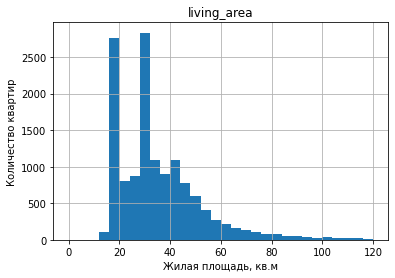

In [39]:
# строим гистограмму
import matplotlib.pyplot as plt

data['living_area'].hist(range=(0, 120), bins=30)

plt.xlabel('Жилая площадь, кв.м')
plt.ylabel('Количество квартир')
plt.title('living_area')

plt.show()


**Изучим параметр объекта "Площадь кухни"**

In [40]:
data['kitchen_area'].describe()

count    12690.000000
mean        10.422420
std          5.696947
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max         93.200000
Name: kitchen_area, dtype: float64

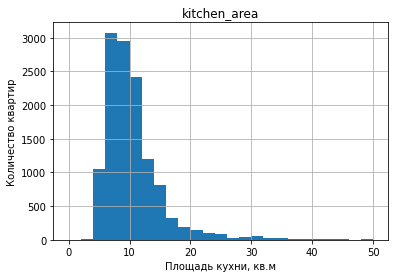

In [41]:
# строим гистограмму
import matplotlib.pyplot as plt

data['kitchen_area'].hist(range=(0, 50), bins=25)

plt.xlabel('Площадь кухни, кв.м')
plt.ylabel('Количество квартир')
plt.title('kitchen_area')

plt.show()

Большинство квартир имеют относительно небольшую площадь кухни, около 10 квадртных метров.Больше 25 метров кухонь совсем мало.  Максимальная площадь кухни 93 м, можно предположить, что такая кваритра относится или к элитному жилью или к квартире со свободной планировкой. 
<br>


In [42]:
median_kitchen_area = data['kitchen_area'].median()
data['kitchen_area'].fillna(median_kitchen_area, inplace=True)

# проверим, убрали ли мы все пропущенные значения в kitchen_area
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        2749
city_centers_nearest    2732
parks_around_3000          0
parks_nearest           8612
ponds_around_3000          0
ponds_nearest           8198
days_exposition         2320
price_sqm                  0
exposition_weekday         0
exposition_month           0
exposition_year            0
floor_type                 0
distance_center         2732
dtype: int64

**Изучим параметр объекта "Цена объекта"**

In [43]:
data['last_price'].describe()

count    1.358000e+04
mean     6.521925e+06
std      7.370422e+06
min      1.219000e+04
25%      3.600000e+06
50%      4.950000e+06
75%      7.100000e+06
max      3.300000e+08
Name: last_price, dtype: float64

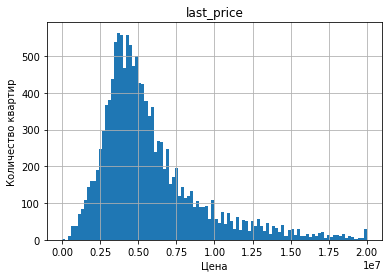

In [44]:
# строим гистограмму
import matplotlib.pyplot as plt

data['last_price'].hist(range=(0, 20_000_000), bins=100)

plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.title('last_price')

plt.show()

Из гистограммы видно, что большинство недвижимости продаются в ценовом диапазоне от 0 до 5 миллионов рублей, причем наиболее часто продаются объекты стоимостью от 3 до 5 миллионов рублей. Есть небольшой всплекс в районе 10 млн. Более дорого жилья процент не велик. 
<br>
Выведем список из самых дорогих квартир, посмотрим, подумаем, нужно ли откинуть эти значения.

In [45]:
print('ТОП-10 максимальных цен:')
print(data['last_price'].sort_values(ascending=False).head(10))

ТОП-10 максимальных цен:
1436     330000000
22831    289238400
15016    150000000
12674    140000000
17912    135000000
2243     130278280
4996     124000000
16647    122000000
492       95000000
12045     86738800
Name: last_price, dtype: int64


посмотрим строку самой дорогой квартиры


In [46]:
print(data.query('last_price == 330000000'))

      total_images  last_price  total_area first_day_exposition  rooms  \
1436            19   330000000       190.0           2018-04-04      3   

      ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
1436             3.5             7         95.0      5          True  ...   

      parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  \
1436          519.0                  3          285.0            233.0   

         price_sqm  exposition_weekday  exposition_month  exposition_year  \
1436  1.736842e+06                   2                 4             2018   

      floor_type  distance_center  
1436      другой              1.0  

[1 rows x 28 columns]


Что ж, может это в Эрмитаже?

**Изучим параметр объекта "Количество комнат"**

In [47]:
data['living_area'].describe()

count    13580.000000
mean        35.117962
std         16.881657
min         15.600000
25%         21.000000
50%         31.200000
75%         43.000000
max        123.000000
Name: living_area, dtype: float64

In [48]:
data['rooms'].describe()

count    13580.000000
mean         2.150957
std          1.000425
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

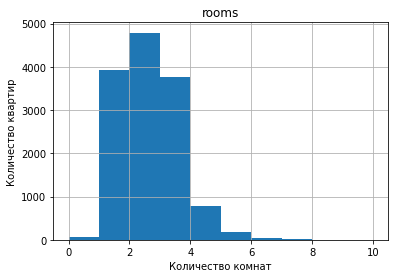

In [49]:
# строим гистограмму
import matplotlib.pyplot as plt

data['rooms'].hist(range=(0, 10), bins=10)

plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.title('rooms')

plt.show()

Максимальное количество комнат – 9, что вполне возможно. Минимальное – 0. Возможно это варианты с открытой планировкой.
<br>
Проверим нашу теорию.

In [50]:
pivot = pd.pivot_table(data.loc[(
    data['rooms'] == 0) & (
    data['open_plan'] == True)], values='last_price', index=['total_area'], aggfunc='count')

print(pivot)

            last_price
total_area            
23.06                1
25.00                2
26.00                1
27.30                1
27.32                1
28.00                1
30.50                1
371.00               1


Площадь вариантов от 23 до 30 кв м может соответствовать квартирам студиям, при заполнении данных могли интерпретировать как отсутсвие комнат; а 371 - тоже может быть квартира без отделки и без стен, как раз открытой планировки. 
<br>

**Изучим параметр объекта "Высота потолков"**

In [51]:
data['ceiling_height'].describe()

count    13580.000000
mean         2.722529
std          0.263496
min          2.500000
25%          2.510000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

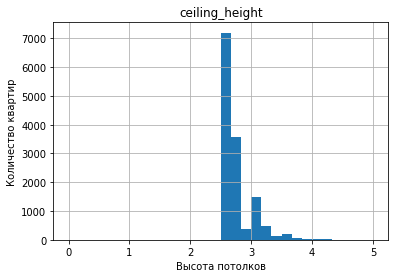

In [52]:
# строим гистограмму
import matplotlib.pyplot as plt

data['ceiling_height'].hist(range=(0, 5), bins=30)

plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.title('ceiling_height')

plt.show()

Ранее мы уже поработали с выбросами и заполненеим пропусков в этом параметре. Большая часть квартир с высотой 2,5; 2,75; далее какое-то количество около 3 и далее до 5 совсем незначительное.
<br>

**Изучим параметр объекта "Этаж квартиры"**

In [53]:
data['floor'].describe()

count    13580.000000
mean         5.551694
std          4.537143
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         30.000000
Name: floor, dtype: float64

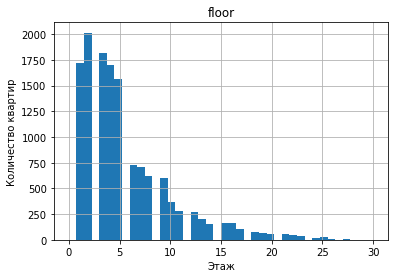

In [54]:
# строим гистограмму
import matplotlib.pyplot as plt

data['floor'].hist(range=(0, 30), bins=40)

plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.title('floor')

plt.show()

Наибольшее число квартир от 1 до 5. Остальных намного меньше. Пропущенных значений нет. Максимум 30 – оказалось, в Петербурге такие дома существуют, так что данные соответствует действительности, идём дальше.
<br>

**Изучим параметр объекта "Тип этажа квартиры"**

In [55]:
data['floor_type'].describe()

count      13580
unique         3
top       другой
freq        9896
Name: floor_type, dtype: object

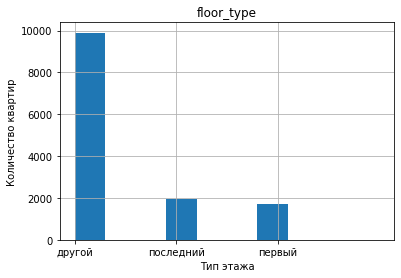

In [56]:
# строим гистограмму
import matplotlib.pyplot as plt

data['floor_type'].hist(range=(0, 3), bins=10)

plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.title('floor_type')

plt.show()

Больше всего квартир с типом этажа "другой" – это вполне логично и выглядит правдоподобно.

**Изучим параметр объекта "Общее количество этажей в доме"**

In [57]:
data['floors_total'].describe()

count    13580.000000
mean        10.067378
std          6.108570
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

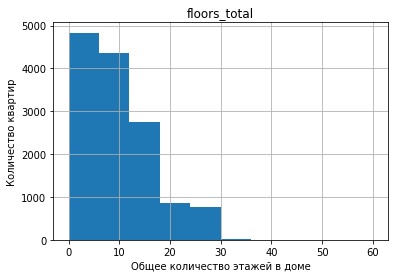

In [58]:
# строим гистограмму
import matplotlib.pyplot as plt

data['floors_total'].hist(range=(0, 60), bins=10)

plt.xlabel('Общее количество этажей в доме')
plt.ylabel('Количество квартир')
plt.title('floors_total')

plt.show()

А здесь наблюдаем явный выбром в виде дома в 60 этаже. Такой вряд ли существует, в Петербурге из высокоэтажных только Лахта-центр, но и там 88, следующий по высотности 42-этажный (нежилой, офисный) и потом 37-этажный (жилой). Интересно, сколько их?
<br>
Смело убираем значения больше 37.

In [59]:
floors_above_37 = data.query('floors_total > 37')['floors_total'].count()

print(floors_above_37)

1


In [60]:
data = data[data['floors_total'] < 37]
print(data[data['floors_total'] > 37].value_counts())

Series([], dtype: int64)


**Изучим параметр объекта "Расстояние до центра"**

In [61]:
data['distance_center'].describe()

count    10847.000000
mean        14.120218
std          8.802760
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: distance_center, dtype: float64

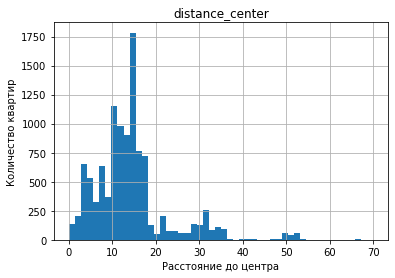

In [62]:
# строим гистограмму
import matplotlib.pyplot as plt

data['distance_center'].hist(range=(0, 70), bins=50)

plt.xlabel('Расстояние до центра')
plt.ylabel('Количество квартир')
plt.title('distance_center')

plt.show()

Лидирует показатель расстояния до центра около 15 км; остальная масса почти равномерно расположилась от 0 до 20 км. Есть и отдельные "выскочки", но аномалий не наблюдаем.
<br>


**Изучим параметр объекта "Расстояние до ближайшего аэропорта"**

In [63]:
data['airports_nearest'].describe()


count    10830.000000
mean     28817.713389
std      12618.402122
min          0.000000
25%      18504.250000
50%      26770.000000
75%      37051.250000
max      84869.000000
Name: airports_nearest, dtype: float64

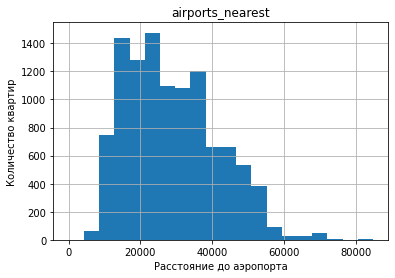

In [64]:
# строим гистограмму
import matplotlib.pyplot as plt

data['airports_nearest'].hist(bins=20)

plt.xlabel('Расстояние до аэропорта')
plt.ylabel('Количество квартир')
plt.title('airports_nearest')

plt.show()


Основные значения лежат в области от 10 до 40 км до аэропорта. Есть небольшой выброс около 80, но такое вполне возможно. Посмотрим, к каким наслённым пунктам они относятся.


In [65]:
pivot_table = pd.pivot_table(
    data[(data['airports_nearest'] > 60)][['airports_nearest', 'locality_name']], 
    index='locality_name', 
    values='airports_nearest', 
    aggfunc='count'
)

print(pivot_table)

                      airports_nearest
locality_name                         
Зеленогорск                         18
Колпино                            193
Красное Село                       106
Кронштадт                           61
Ломоносов                           88
Павловск                            23
Петергоф                           142
Пушкин                             223
Санкт-Петербург                   9463
Сестрорецк                         122
посёлок Лисий Нос                    2
посёлок Металлострой                47
посёлок Молодежное                   5
посёлок Парголово                  101
посёлок Песочный                     2
посёлок Понтонный                   12
посёлок Репино                       4
посёлок Саперный                     3
посёлок Стрельна                    26
посёлок Шушары                     188


Да, всё верно, не смотря на то, что большая часть (9463) этих квартир в Петербурге.Границы Санкт-Петербурга в Курортном районе достигают Зеленогорска и это как раз около 80 км. 

**Изучим параметр объекта "Расстояние до ближайшего парка"**

In [66]:
data['parks_nearest'].describe()


count    4967.000000
mean      477.903564
std       320.847995
min         3.000000
25%       287.000000
50%       451.000000
75%       602.000000
max      3190.000000
Name: parks_nearest, dtype: float64

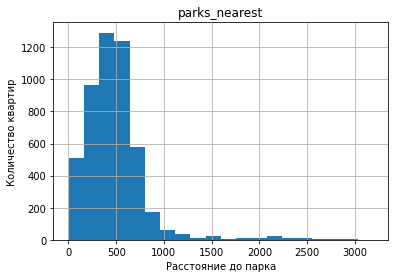

In [67]:
# строим гистограмму
import matplotlib.pyplot as plt

data['parks_nearest'].hist(bins=20)

plt.xlabel('Расстояние до парка')
plt.ylabel('Количество квартир')
plt.title('parks_nearest')

plt.show()


Большая часть квартир располагается всего в полкилометре от ближайшего парка. То ли повезло, то ли парков так много!
Но не будем забывать о пропусках значений в этом столбце и их было не мало. А именно 15 620, это 66%. Не подгрузились картографические данные или совсем с парками беда? В любом случае заполнить пустые значения нечем.


**Изучим параметр объекта "Расстояние до ближайшего водоёма"**

In [68]:
data['ponds_nearest'].describe()


count    5381.000000
mean      520.426129
std       280.079206
min        16.000000
25%       289.000000
50%       505.000000
75%       734.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

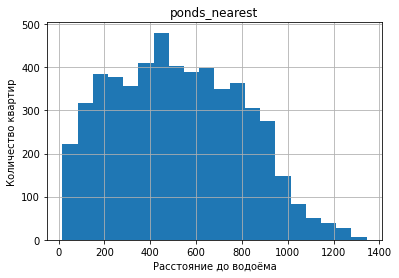

In [69]:
# строим гистограмму
import matplotlib.pyplot as plt

data['ponds_nearest'].hist(bins=20)

plt.xlabel('Расстояние до водоёма')
plt.ylabel('Количество квартир')
plt.title('ponds_nearest')

plt.show()


С водоёмами тоже красота - до 1 км. Максимум 1,3. Порадоваться бы за владельцев, но с грустью вспоминаем о пропусках значений как раз в этом параметре. Пропусков было аж 61,5%.
Поскольку данные подгружались автоматически винить во всём будем бездушную машину, заполнить пропуски не представляется возомжным. 


**Изучим параметр объекта "День недели публикации объявления"**

In [70]:
data['exposition_weekday'].describe()

count    13579.000000
mean         2.505855
std          1.790021
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          6.000000
Name: exposition_weekday, dtype: float64

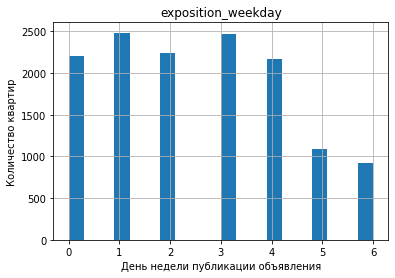

In [71]:
# строим гистограмму
import matplotlib.pyplot as plt

data['exposition_weekday'].hist(bins=20)

plt.xlabel('День недели публикации объявления')
plt.ylabel('Количество квартир')
plt.title('exposition_weekday')

plt.show()


Почти в два раза реже продаются квартиры в выходные, оно и понятно - не до этого, да и всем отдыхать надо, риэлторы, что не люди? В будние дни практически одинаково ровно. 

**Изучим параметр объекта "Месяц публикации объявления"**

In [72]:
data['exposition_month'].describe()

count    13579.000000
mean         6.318212
std          3.506197
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64

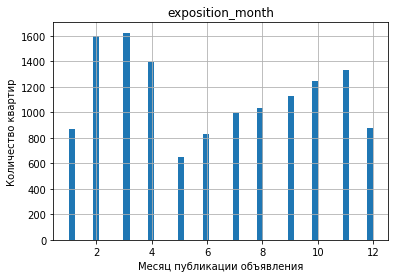

In [73]:
# строим гистограмму
import matplotlib.pyplot as plt

data['exposition_month'].hist(bins=50)

plt.xlabel('Месяц публикации объявления')
plt.ylabel('Количество квартир')
plt.title('exposition_month')

plt.show()


Рекорсмены по продажам февраль, март и апрель. Резкий спад в мае – видимо все по отпускам и не до квартир. Подбирается к тройке лидеров ноябрь – кто-то готовит подарки на новый год! 

**Изучим параметр объекта "Год публикации объявления"**

In [74]:
data['exposition_year'].describe()

count    13579.000000
mean      2017.514913
std          1.027094
min       2014.000000
25%       2017.000000
50%       2018.000000
75%       2018.000000
max       2019.000000
Name: exposition_year, dtype: float64

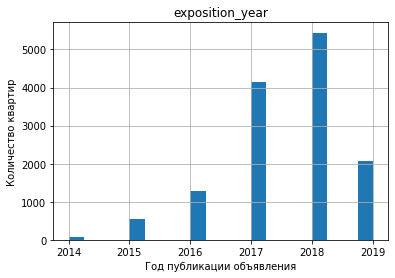

In [75]:
# строим гистограмму
import matplotlib.pyplot as plt

data['exposition_year'].hist(bins=20)

plt.xlabel('Год публикации объявления')
plt.ylabel('Количество квартир')
plt.title('exposition_year')

plt.show()


За исследумый период (с 2014 по 2019 годы) самый урожаный на продажи выдался 2018. Затем покупательская способность резко снизилась. Возможно, данные за 2019 оказались не полные или все карты спутал экономический кризис (который из них, уже не разберёшь). 

**Изучим, как быстро продавались квартиры** 

Но для начала заполним пропуски медианными значениями

In [76]:
median_days_exposition = data['days_exposition'].median()
data['days_exposition'].fillna(median_days_exposition, inplace=True)
# сразу проверим 
data['days_exposition'].isna().value_counts()

False    13579
Name: days_exposition, dtype: int64

In [77]:
data['days_exposition'].describe()


count    13579.000000
mean       174.908241
std        209.907182
min          1.000000
25%         53.000000
50%        103.000000
75%        200.000000
max       1580.000000
Name: days_exposition, dtype: float64

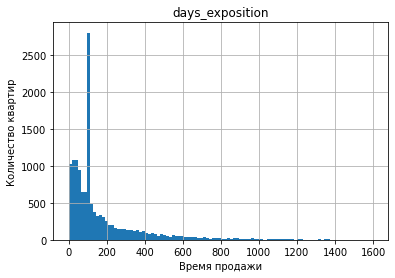

In [78]:
# строим гистограмму
import matplotlib.pyplot as plt

data['days_exposition'].hist(range=(0, 1600), bins=100)

plt.xlabel('Время продажи')
plt.ylabel('Количество квартир')
plt.title('days_exposition')

plt.show()


Большая часть квартир продаётся примерно за 5 месяцев, немалая часть даже раньше. Есть единичные случаи зависания продажи и на 4 года. Быстрой продажей можно назвать ту, что уложилась в 50 дней, а долгая около 200 дней. 
<br> Среднее время продажи – 186 дней.
<br> Медианнное – 165 дней.
Оба значения довольно высоки, получилось так из-за объявлений висевших на сайте до 4 лет. 

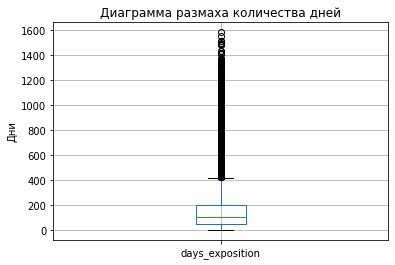

In [79]:
import matplotlib.pyplot as plt

data.boxplot(column=['days_exposition'])
plt.title('Диаграмма размаха количества дней')
plt.ylabel('Дни')
plt.show()


**Факторы, больше всего влияющие на продажи квартир** 

Чтобы определить какой из параметров:
<br>- общая площадь;
<br>- жилая площадь;
<br>- площадь кухни;
<br>- количество комнат;
<br>- этаж, на котором расположена квартира (первый, последний, другой);
<br>- дата размещения (день недели, месяц, год);
<br>
<br>
как и насколько влияет на полную стоимость квартиры, постоим сводные таблицы и графики. 

In [80]:
display('Коэффициент корреляции между стоимостью и общей площадью:', data['total_area'].corr(data['last_price']))
display('Коэффициент корреляции между стоимостью и жилой площадью:', data['living_area'].corr(data['last_price']))
display('Коэффициент корреляции между стоимостью и площадью кухни:', data['kitchen_area'].corr(data['last_price']))
display('Коэффициент корреляции между стоимостью и количеством комнат:', data['rooms'].corr(data['last_price']))
display('Коэффициент корреляции между стоимостью и днём размещения:', data['exposition_weekday'].corr(data['last_price']))
display('Коэффициент корреляции между стоимостью и месяцем размещения:', data['exposition_month'].corr(data['last_price']))
display('Коэффициент корреляции между стоимостью и годом размещения:', data['exposition_year'].corr(data['last_price']))

'Коэффициент корреляции между стоимостью и общей площадью:'

0.6562410175691639

'Коэффициент корреляции между стоимостью и жилой площадью:'

0.4799847120376781

'Коэффициент корреляции между стоимостью и площадью кухни:'

0.48411683197487176

'Коэффициент корреляции между стоимостью и количеством комнат:'

0.35448581893835107

'Коэффициент корреляции между стоимостью и днём размещения:'

-0.016548885311188873

'Коэффициент корреляции между стоимостью и месяцем размещения:'

-0.003986329272659307

'Коэффициент корреляции между стоимостью и годом размещения:'

-0.04765177678779825

Стоимость имеет наибольшую положительную корреляцию с общей площадью квартиры (0.66), что означает, что при увеличении общей площади стоимость также увеличивается.
<br>
<br>
Жилая площадь и площадь кухни имеют более слабую положительную корреляцию со стоимостью (0.48 для жилой площади и 0.48 для площади кухни), что означает, что при увеличении жилой площади или площади кухни стоимость также увеличивается, но не так сильно, как в случае с общей площадью.
<br>
<br>
Количество комнат имеет слабую положительную корреляцию со стоимостью (0.35), что означает, что связь между количеством комнат и стоимостью не так сильна.
<br>
<br>
День, месяц и год размещения имеют очень слабую отрицательную корреляцию со стоимостью, что означает, что связь между днем, месяцем и годом размещения и стоимостью практически отсутствует.
<br>


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

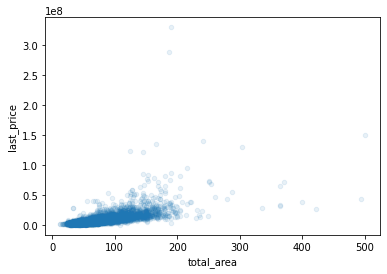

In [81]:
# график зависмости цены и жилой площади
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1)

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

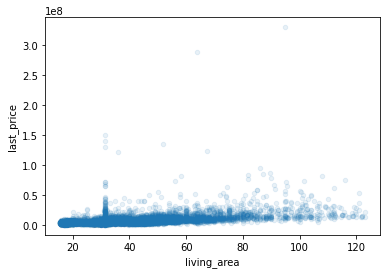

In [82]:
# график зависмости цены и жилой площади
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.1)

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

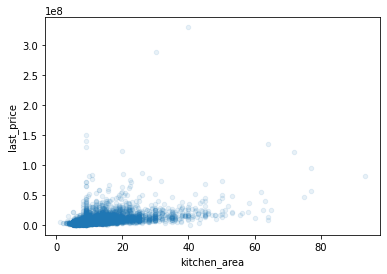

In [83]:
# график зависмости цены и площади кухни
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.1)

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Отсутствует решение по кол-ву комнат
</div>

<div class="alert alert-info"> <b>Комментарии студента №1:</b> Упс, пропустила – подготовила код и недоделала, исправляюсь :).</div>

In [84]:
# выведем pivot table для цены и количеством комнат
data.pivot_table(index='rooms', values='last_price', aggfunc='median')

,last_price
rooms,
0,3100000
1,3697000
2,4900000
3,6294500
4,9000000
5,12530000
6,13351000
7,24500000
8,19145000


<AxesSubplot:title={'center':'стоимость'}, xlabel='rooms'>

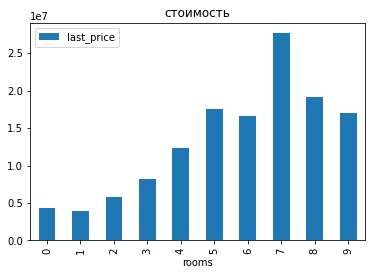

In [85]:
 # сделаем график зависимости цены и количества комнат

data.pivot_table(index='rooms', values='last_price').plot(
    y='last_price', kind='bar', title='стоимость')


Как мы видим из графика цена различается в зависимости от количества комтат – так внезпано в лидеры выбились 7-комнатные квартиры. Хотя чего удивляться, такое колчиство комнат может свидетельствовать об элитном типе жилья.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №2__

Моя ошибка. Проглядел этот момент на прошлой итерации. Сейчас ты считаешь кол-во объявлений по каждому пункту (кроме площадей и типа этажа). А нам нужна зависимость от конктерной "метрики"
</div>

<div class="alert alert-info"> <b>Комментарии студента №2:</b> Ой, а возможно это и я на первой итерации поменяла после комментария про линейную или столбчатую диаграмму.. уже запуталась и точно не скажу.</div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Зависимости прерывных данных (тип этажа, месяц, комнаты) лучше рассмотреть на линейной или столбчатой диаграмме (сгруппировав предварительно)
</div>

<div class="alert alert-info"> <b>Комментарии студента №1:</b> Так и сделаю! Для комнат выбрала линейную, для остальных параметров стобчатую - для разнообразия.</div>

In [86]:
# выведем pivot table для дня размещения и стоимости
data.pivot_table(index='exposition_weekday', values='last_price', aggfunc='median')

,last_price
exposition_weekday,
0,5000000
1,5025000
2,4950000
3,4900000
4,4800000
5,4800000
6,4770000


<AxesSubplot:title={'center':'стоимость'}, xlabel='exposition_weekday'>

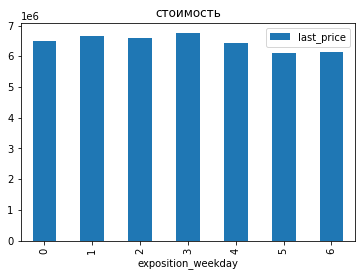

In [87]:
 # сделаем график зависимости дня размещения и стоимости

data.pivot_table(index='exposition_weekday', values='last_price').plot(
    y='last_price', kind='bar', title='стоимость')

Из графика видим – от дня недели размещения объявления цена не зависит!

In [88]:
# выведем pivot table для месяца размещения и стоимости
data.pivot_table(index='exposition_month', values='last_price', aggfunc='median')

,last_price
exposition_month,
1,4999500
2,4990000
3,4800000
4,5097500
5,4846000
6,4794500
7,5089500
8,4990000
9,4990000


<AxesSubplot:title={'center':'стоимость'}, xlabel='exposition_month'>

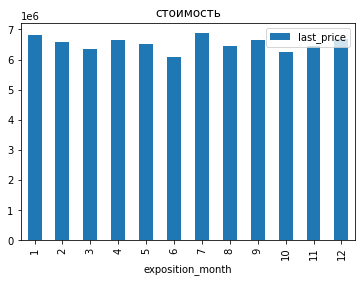

In [89]:
# график зависмости цены и месяца размещения объявления
data.pivot_table(index='exposition_month', values='last_price').plot(
    y='last_price', kind='bar', title='стоимость')


Зависимости стоимости квартир от месяца размещения объявления практически не наблюдаем.

In [90]:
# выведем pivot table для года размещения и стоимости
data.pivot_table(index='exposition_year', values='last_price', aggfunc='median')

,last_price
exposition_year,
2014,7640000
2015,5600000
2016,4950000
2017,4800000
2018,4800000
2019,5250000


<AxesSubplot:title={'center':'стоимость'}, xlabel='exposition_year'>

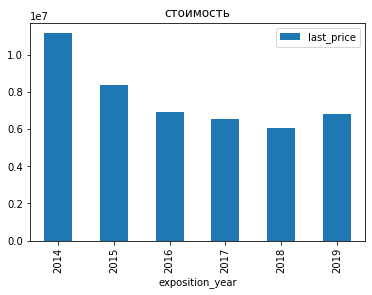

In [91]:
# график зависмости цены и года размещения объявления
data.pivot_table(index='exposition_year', values='last_price').plot(
    y='last_price', kind='bar', title='стоимость')

Зависимость от года публикации объявления небольшая.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №3__

Отличный инсайд для заказчика) Молодец
</div>

In [92]:
# выведем pivot table для типа этажа
data.pivot_table(index='floor_type', values='last_price', aggfunc='median')


,last_price
floor_type,
другой,5120000
первый,4100000
последний,4540000


<AxesSubplot:title={'center':'стоимость'}, xlabel='floor_type'>

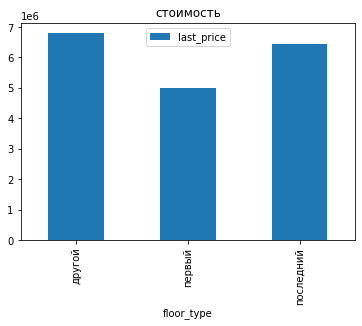

In [93]:
# сделаем график для получившейся pivot table
data.pivot_table(index='floor_type', values='last_price').plot(
    y='last_price', kind='bar', title='стоимость')


Зависимости цены от типа этажа почти нет. 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Как в песне, "первый и последний этаж не предлагать". Традиционно, квартиры на первом и последнем этажах считаются самыми неудобными для жизни и это отражается на их стоимости.
</div>

Зависимость цены от параметров распределилась следующим образом (по убыванию):
<br>- общая площадь квартир;
<br>- площадь кухни;
<br>- жилая площадь;
<br>- количество комнат.
<br>
<br>
А вот зависимости цены от дня, месяца, года размещения объявления и этажа квартиры – нет.

**Средняя цена одного квадратного метра в 10 населённых пунктах**
<br>
<br>
Найдём топ-10 локаций с самым большим количеством объявлений

In [94]:
localities_top_10 = data['locality_name'].value_counts().head(10)
display(localities_top_10)

Санкт-Петербург    9509
Всеволожск          255
Пушкин              223
Колпино             193
посёлок Шушары      189
посёлок Мурино      163
Гатчина             149
Петергоф            142
Сестрорецк          122
Красное Село        107
Name: locality_name, dtype: int64

Больше всего объявлений предсказуемо в Санкт-Петербурге. Теперь посчитаем среднюю цену за квадратный метр в этих городах.

In [95]:
localities_top_10_price = data.query('locality_name in @localities_top_10.index').pivot_table(index='locality_name', values='price_sqm')
localities_top_10_price = localities_top_10_price.astype(int)
localities_top_10_price.sort_values('price_sqm', ascending=False)


,price_sqm
locality_name,
Санкт-Петербург,114390
Пушкин,103661
Сестрорецк,101785
Петергоф,85721
посёлок Мурино,84067
посёлок Шушары,77694
Колпино,75557
Красное Село,72593
Гатчина,69992


Самая высокая стоимость за квадратный метр ожидаемо в Санкт-Петербурге, самая низкая – во Всеволожске.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Смотри, как можно в 1 строку:
</div>

In [96]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,9509,5700000
Всеволожск,255,3600000
Пушкин,223,5194638
Колпино,193,3800000
посёлок Шушары,189,4160000
посёлок Мурино,163,3990000
Гатчина,149,3300000
Петергоф,142,3775000
Сестрорецк,122,5800000


<div class="alert alert-info"> <b>Комментарии студента №1:</b> Точно! Спасибо :).</div>

**Cтоимость квартир Санкт-Петербурга в зависимости от расстояния до центра города**


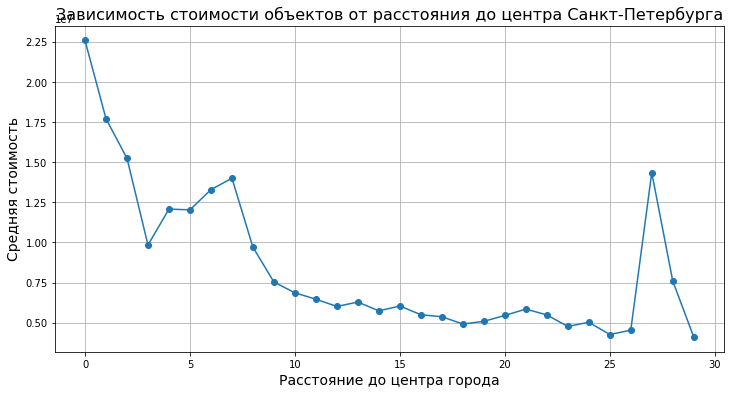

In [97]:

data_spb = data.query('locality_name == "Санкт-Петербург"')
data_spb_km = data_spb.groupby('distance_center')['last_price'].mean()

# визуализируем в виде графика
data_spb_km.plot(style='o-', figsize=(12, 6), grid=True)
plt.title('Зависимость стоимости объектов от расстояния до центра Санкт-Петербурга', fontsize=16)
plt.xlabel('Расстояние до центра города', fontsize=14)
plt.ylabel('Средняя стоимость', fontsize=14)
plt.show()



<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличный и наглядный график 👍
    
Здорово, когда он подписан. Так быстрее понять о чем идёт речь на нём.
    
</div>

Пик самой высокой стоимости квартир сконцентрировался в максимальной близости к центру города, что вполне логично. Также наблюдается некий всплеск на расстоянии около 27 км. Как раз примерно на таком расстоянии находится г.Пушкин, один из ближаших пригородов, со вторым показателем стоимости недвижимости после Петербурга. Примерно такая же цена соотвествует объектам, находящимся в 8 км от центра.

### Общий вывод

1. Получив данные предоставленной таблицы, мы сразу изучили общие данные, получили статистические характеристики и информацию о пропусках. Визуально оценить информацию помогли гистограммы, выведенные по всем столбцам датафрейма. 
2. На шаге предобработки, мы избавились от пропусков – заполнили где возможно отсутствующие значения нулями, медианными значениями или удалили строки, если их количество было не критичным и их отсутствие не исказило бы общую картину. При анализе пропусков сделали выводы, что некоторые пропуски заполнить невозможно, а возникли некоторые из них видимо из-за технического сбоя автоматизированного заполнения из картографических данных.
Для возможности дальнейшей корректной работы и для экономии памяти изменили тип данных у нескольких столбцов.
3. Поработав с уникальными значениями поняли, что унификация некоторых парметров сильно важна, например, буква ё в или похожие но немного разные названия одних и тех же населённых пунктов.
4. Поработали с редкими и выбивающимися значениями. Такие данные сильно вляют на средние, медианные значения, искажают графики и могут увести аналитика к ошибочным выводам.
5. Добавление некоторых стобцов в таблицу в дальнейшем помогло исследовтельскому анализу данных, построению графиков.
6. Проведя анализ архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах, можно сделать следующие выводы:
- стоимость зависит от общая площадь квартир, площади кухни, жилой площади, в меньшей степени от количества комнат и не имеет зависимости от дня размещения объявления и этажа;
- самые дорогие квартиры в Санкт-Петербурге, далее идут ближайшие пригороды. Замыкает топ-десятку населённых пунктов по продажам – цена во Всеволожске;
- пик самой высокой стоимости квартир сконцентрирован в максимальной близости к центру города. Наблюдается всплеск на расстоянии около 27 км. Такая же цена соответствует объектам, находящимся в 8 км от центра.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Шикарный вывод и рекомендации для бизнеса. Кстати, хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. Ведь вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно. Ты молодец!
</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:

1) Шаг 4.1 (день, месяц)

2) Шаг 4.3 (кол-во комнат)

3) После каждого раздела / графика (или серии тестов) писать вывод по полученным данным с учетом поставленной бизнес задачи

4) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-info"> <b>Комментарии студента №1:</b> Александр, спасибо большое за такую высокую 
оценку! Проект объёмный, всё-таки не удалось избежать некоторых пропусков описаний и выводов (а где-то наоборот возможно перемудрила). 

Мне было интересно и главное - полезно читать твои комментарии. Кое-что отметила себе ещё раз повторить, ссылочки сохранила на изучить!

Постаралась учесть комментарии и скорректировать в соответсвии с ними. Фух, надеюсь ничего не упустила критично важного! Еще раз спасибо!</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №2 </b> 



Дарья, у тебя отличная работа. Упустил один момент я((( Давай его поправим

---

Нужно поправить:


1) Шаг 4.3 (построить графики зависимостей. День, месяц, год, кол-во комнат)

2) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-info"> <b>Комментарии студента №2:</b> Александр, вроде бы "домучала" шаг 4.3, надеюсь сейчас там ок или близко к тому 🤞 У меня вопросов в целом нет. Словила себя на мысли, что какие-то соображения по коду и графикам благодаря твоим комментариям лучше уложились в голову (во всяком случае надеюсь!) Спасибо:) </div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №3__


Дарья, спасибо тебе за обратную связь и правки ^^    
    
---    
    
В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
    
---
    
От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод